In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Settings
plt.style.use('seaborn-v0_8')
sns.set(rc={'figure.figsize': (12, 6)})

In [3]:
df = pd.read_csv('city_hour.csv')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (707875, 16)
Columns: ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


### Basic Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [5]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,562787.0,67.622994,74.730496,0.01,26.20,46.42,79.49,999.99
PM10,411138.0,119.075804,104.224752,0.01,52.38,91.50,147.52,1000.00
NO,591243.0,17.421755,32.095211,0.01,3.84,7.96,16.15,499.99
NO2,590753.0,28.885157,29.162194,0.01,10.81,20.32,36.35,499.51
NOx,584651.0,32.287565,39.756669,0.00,10.66,20.79,37.15,498.61
NH3,435333.0,23.607959,28.831900,0.01,8.12,15.38,29.23,499.97
CO,621358.0,2.183539,10.970514,0.00,0.42,0.80,1.37,498.57
SO2,577502.0,14.038307,19.305540,0.01,4.88,8.37,14.78,199.96
O3,578667.0,34.798979,29.806379,0.01,13.42,26.24,47.62,497.62
Benzene,544229.0,3.087595,16.456599,0.00,0.05,0.86,2.75,498.07


In [7]:
# Drop rows with invalid datetime
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
else:
    raise KeyError("❌ 'Datetime' column not found in dataset!")

In [8]:
# Drop rows with completely invalid datetime
df = df.dropna(subset=["Datetime"])

In [9]:
# Sort data for time-series analysis
df = df.sort_values(by=['City','Datetime']).reset_index(drop=True)

In [10]:
# Handle unrealistic sensor values (cap readings: 500, 999, 1000)
for col in ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]:
    df[col] = df[col].mask(df[col] > 500, np.nan)   
df["PM10"] = df["PM10"].mask(df["PM10"] > 1000, np.nan)  
df["AQI"] = df["AQI"].mask(df["AQI"] > 1000, np.nan)    


In [11]:
# Interpolate missing values by city (time-based)

def safe_interpolate(group):
    group = group.set_index("Datetime").sort_index()
    
    # Check if index is datetime type
    if pd.api.types.is_datetime64_any_dtype(group.index):
        return group.interpolate(method="time")
    else:
        return group.interpolate()  # fallback to numeric interpolation

df = (
    df.groupby("City", group_keys=False)
      .apply(safe_interpolate)
      .reset_index()
)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3902398338.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return group.interpolate(method="time")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3902398338.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return group.interpolate(method="time")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3902398338.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return group.interpolate(method="time")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3902398338.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a fut

In [12]:
# If any NaNs still remain, forward/backward fill
df = df.fillna(method="ffill").fillna(method="bfill")

# Drop duplicates if any
df = df.drop_duplicates()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3066542043.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [13]:
print("After cleaning, dataset shape:", df.shape)

After cleaning, dataset shape: (707875, 16)


In [14]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Datetime      0
City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


# Exploratory Data Analysis

##### AQI Distribution

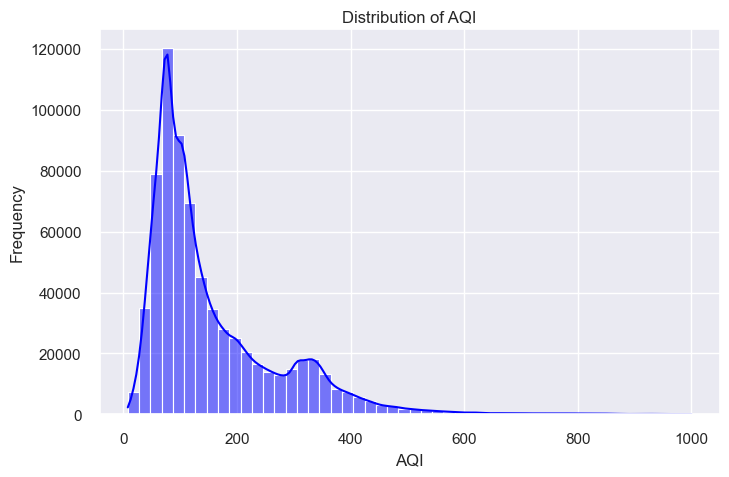

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=50, kde=True, color="blue")
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

##### AQI Bucket Count

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\3608105165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AQI_Bucket", data=df,


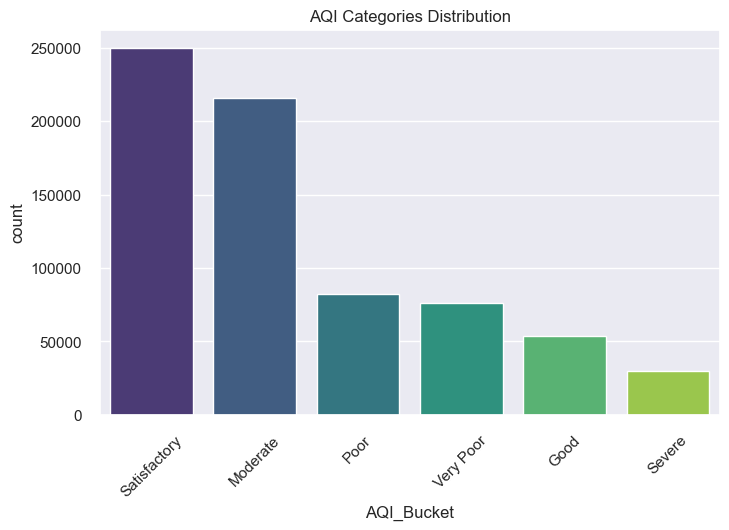

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="AQI_Bucket", data=df, 
              order=df['AQI_Bucket'].value_counts().index, palette="viridis")
plt.title("AQI Categories Distribution")
plt.xticks(rotation=45)
plt.show()

##### City-wise Average AQI (top 15)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\1125357360.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette=colors)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20348\1125357360.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette=colors)


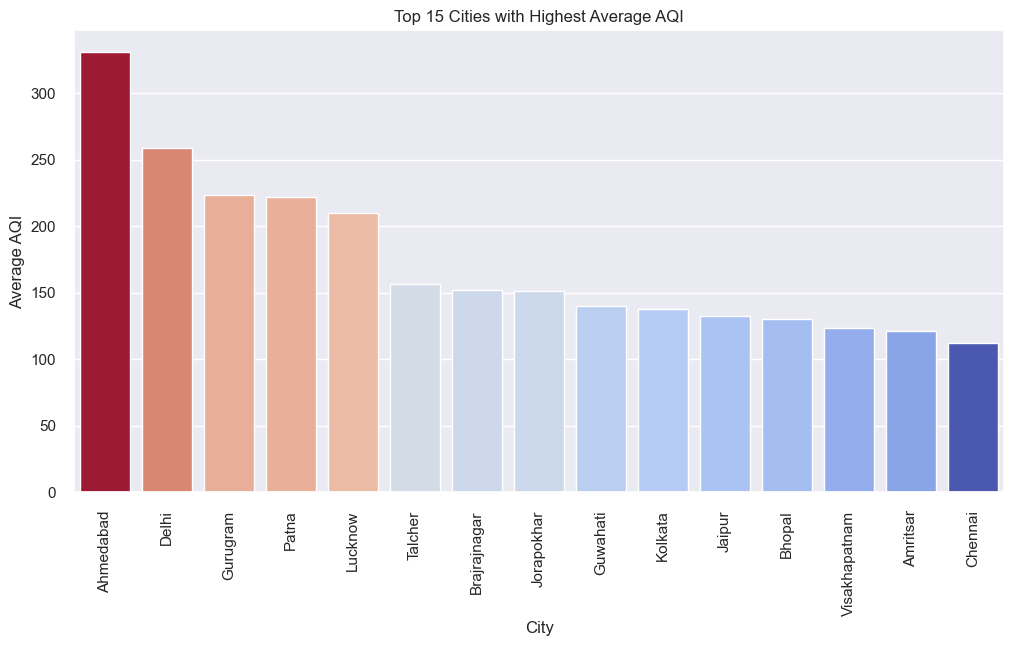

In [17]:
city_aqi = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(15)

norm = mpl.colors.PowerNorm(gamma=0.5, vmin=city_aqi.min(), vmax=city_aqi.max())
colors = plt.cm.coolwarm(norm(city_aqi.values))


plt.figure(figsize=(12,6))
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette=colors)
plt.xticks(rotation=90)
plt.title("Top 15 Cities with Highest Average AQI")
plt.ylabel("Average AQI")
plt.show()

##### Trend Over Time (Delhi)

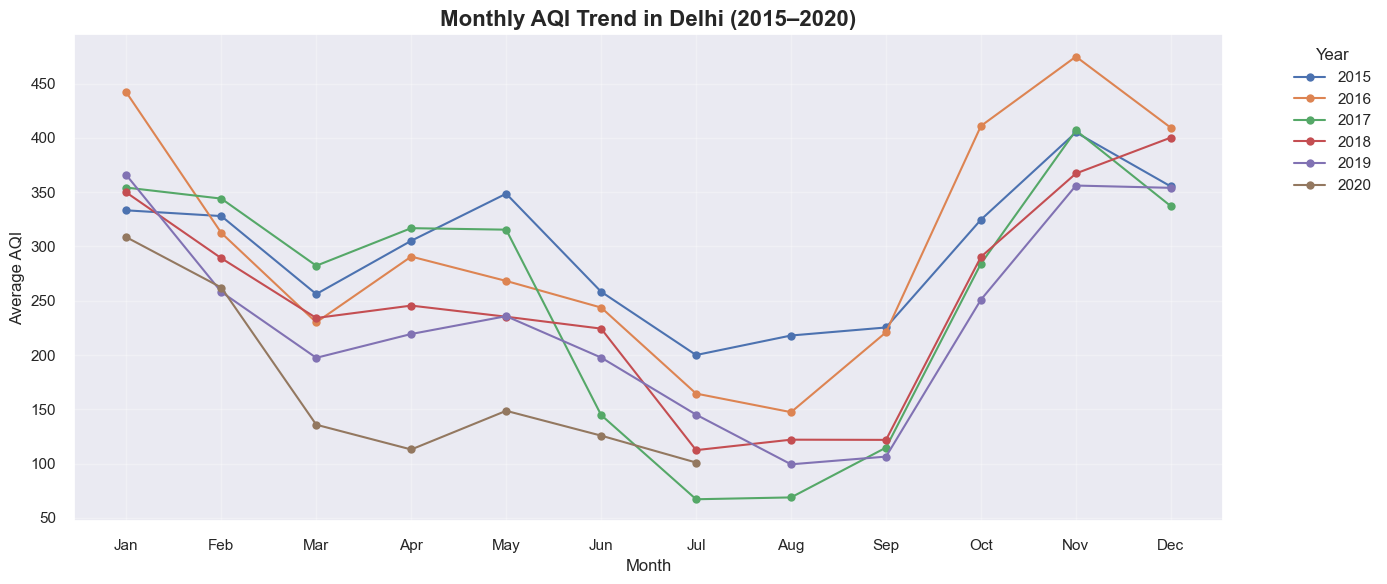

In [18]:
# Add Year & Month columns
delhi = df[df["City"] == "Delhi"].set_index("Datetime")

delhi['Year'] = delhi.index.year
delhi['Month'] = delhi.index.month

# Restrict to 2015–2020
delhi = delhi[(delhi['Year'] >= 2015) & (delhi['Year'] <= 2020)]

# Group by year & month
monthly_aqi = delhi.groupby(['Year','Month'])['AQI'].mean().unstack(0)

# Better month labels (Jan–Dec)
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
monthly_aqi.index = month_names

# Plot with style
plt.figure(figsize=(14,6))
for year in monthly_aqi.columns:
    plt.plot(monthly_aqi.index, monthly_aqi[year], marker="o", label=str(year))

plt.title("Monthly AQI Trend in Delhi (2015–2020)", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average AQI", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### Correlation Heatmap

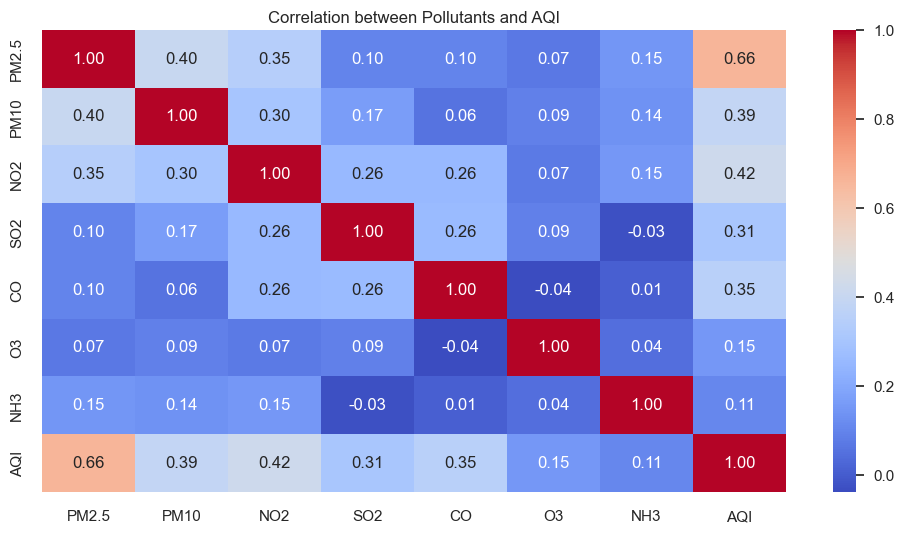

In [19]:
sns.heatmap(df[["PM2.5","PM10","NO2","SO2","CO","O3","NH3","AQI"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Pollutants and AQI")
plt.show()

##### Boxplot of Pollutants (After Cleaning Dataset)

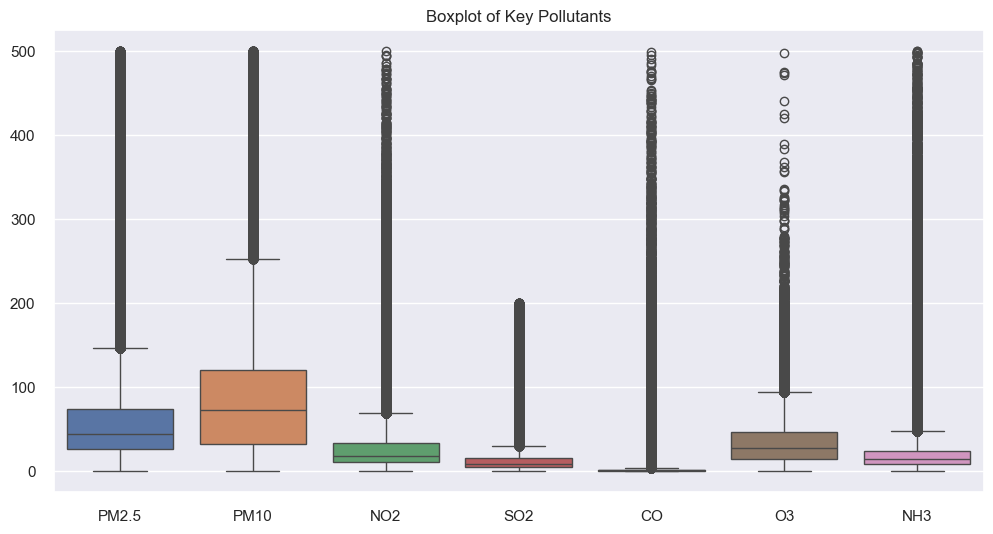

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["PM2.5","PM10","NO2","SO2","CO","O3","NH3"]])
plt.title("Boxplot of Key Pollutants")
plt.show()